# HEAPO: Descriptive Analyses
Refer to the "Descriptive Analses" section in the dataset description paper for details.

### Imports
**Note:** Before running the script, ensure that `data_path` is set to the correct location of the stored data.

In [11]:
# ----------------------
# IMPORT OTHER PACKAGES 
# ----------------------
import os 
import sys
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
plt.rcParams["font.family"] = "sans-serif"
from tqdm import tqdm

# ----------------------
# IMPORT HEAPO SCRIPTS
# ----------------------

# either run script heapo.py inside the src folder
# folder_path = os.path.dirname(os.getcwd())+'/src/'
# %run -i {folder_path + 'heapo.py'}

# or import heapo as a package - RECOMMENDED because Visual Studio Code then recognizes the package
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(0, folder_path)
sys.path.insert(0, folder_path + '/heapo/src')
from heapo import *

# ---------------------------------------
# DEFINE PATH TO WHERE THE DATA IS STORED
# ---------------------------------------

# NOTE: if data is stored under /data/ within this repository --> set data_path = None 
data_path = None

# otherwise please provide the absolute path to the HEAPO dataset including the last slash
# data_path = '/Users/user/path/to/heapo_data/'

# ---------------------------------------
# CREATE HEAPO OBJECT
# ---------------------------------------

# create HEAPO object
heapo = HEAPO(data_path=data_path, use_local_time=False, suppress_warning=False)

### Study Population Statistics

In [12]:
df_meta = heapo.get_meta_data_overview()
original_length = len(df_meta)
df_meta = df_meta[df_meta['MetaData_Available']==True]
print('Number of households with some meta data available: {} ({} %)'.format(len(df_meta), np.round(len(df_meta)/original_length*100, 2)))

# create one data frame to store all statistics 
df_stats_all = pd.DataFrame()

# loop across groups 
for group in ['all', 'treatment', 'control']:

    # get meta data
    df_meta = heapo.get_meta_data_overview()
    if group in ['treatment', 'control']:
        df_meta = df_meta[df_meta['Group'] == group]

    # get statistics 
    description_dict = {
        'Households - Total': str(len(df_meta)),
        'Households - With 15-min SMD' : '{} ({} %)'.format(len(df_meta[df_meta['SmartMeterData_Available_15min']==True]), round(len(df_meta[df_meta['SmartMeterData_Available_15min']==True])/len(df_meta)*100, 2)),
        'Households - With Daily SMD' : '{} ({} %)'.format(len(df_meta[df_meta['SmartMeterData_Available_Daily']==True]), round(len(df_meta[df_meta['SmartMeterData_Available_Daily']==True])/len(df_meta)*100, 2)),
        'Households - With ASHP' : '{} ({} %)'.format(len(df_meta[df_meta['Survey_HeatPump_Installation_Type']=='air-source']), round(len(df_meta[df_meta['Survey_HeatPump_Installation_Type']=='air-source'])/len(df_meta)*100, 2)),
        'Households - With GSHP' : '{} ({} %)'.format(len(df_meta[df_meta['Survey_HeatPump_Installation_Type']=='ground-source']), round(len(df_meta[df_meta['Survey_HeatPump_Installation_Type']=='ground-source'])/len(df_meta)*100, 2)),
        'Households - With PV system': '{} ({} %)'.format(len(df_meta[df_meta['Installation_HasPVSystem']==True]), round(len(df_meta[df_meta['Installation_HasPVSystem']==True])/len(df_meta)*100, 2)),
        'Households - With EV': '{} ({} %)'.format(len(df_meta[df_meta['Survey_Installation_HasElectricVehicle']==True]), round(len(df_meta[df_meta['Survey_Installation_HasElectricVehicle']==True])/len(df_meta)*100, 2)),
        'Households - With Dryer': '{} ({} %)'.format(len(df_meta[df_meta['Survey_Installation_HasDryer']==True]), round(len(df_meta[df_meta['Survey_Installation_HasDryer']==True])/len(df_meta)*100, 2)),
        'Households - With Freezer':  '{} ({} %)'.format(len(df_meta[df_meta['Survey_Installation_HasFreezer']==True]), round(len(df_meta[df_meta['Survey_Installation_HasFreezer']==True])/len(df_meta)*100, 2)),
        'Households - With Radiators': '{} ({} %)'.format(len(df_meta[df_meta['Survey_HeatDistribution_System_Radiator']==True]), round(len(df_meta[df_meta['Survey_HeatDistribution_System_Radiator']==True])/len(df_meta)*100, 2)),
        'Households - With Floor Heating': '{} ({} %)'.format(len(df_meta[df_meta['Survey_HeatDistribution_System_FloorHeating']==True]), round(len(df_meta[df_meta['Survey_HeatDistribution_System_FloorHeating']==True])/len(df_meta)*100, 2)),
        'Households - With DHW by HP': '{} ({} %)'.format(len(df_meta[df_meta['Survey_DHW_Production_ByHeatPump']==True]), round(len(df_meta[df_meta['Survey_DHW_Production_ByHeatPump']==True])/len(df_meta)*100, 2)),
        'Households - With DHW by EWH': '{} ({} %)'.format(len(df_meta[df_meta['Survey_DHW_Production_ByElectricWaterHeater']==True]), round(len(df_meta[df_meta['Survey_DHW_Production_ByElectricWaterHeater']==True])/len(df_meta)*100, 2)),
        'Households - With DHW by Solar': '{} ({} %)'.format(len(df_meta[df_meta['Survey_DHW_Production_BySolar']==True]), round(len(df_meta[df_meta['Survey_DHW_Production_BySolar']==True])/len(df_meta)*100, 2)),
        'Number of Residents' : '{} +- {}'.format(round(df_meta['Survey_Building_Residents'].mean(), 2), round(df_meta['Survey_Building_Residents'].std(), 2)),
        'Average Living Area' : '{} +- {}'.format(round(df_meta['Survey_Building_LivingArea'].mean(), 2), round(df_meta['Survey_Building_LivingArea'].std(), 2)),
    }

    # store statistics 
    df_stats = pd.DataFrame.from_dict(description_dict, orient='index', columns=[group])
    df_stats.reset_index(inplace=True)
    df_stats.rename(columns={'index': 'Description'}, inplace=True)
    
    if len(df_stats_all) == 0:
        df_stats_all = df_stats
    else: 
        df_stats_all = pd.merge(df_stats_all, df_stats, on='Description', how='outer')

display(df_stats_all)

Number of households with some meta data available: 1358 (96.45 %)


,Description,all,treatment,control
0,Households - Total,1408,214,1194
1,Households - With 15-min SMD,1407 (99.93 %),214 (100.0 %),1193 (99.92 %)
2,Households - With Daily SMD,1298 (92.19 %),156 (72.9 %),1142 (95.64 %)
3,Households - With ASHP,778 (55.26 %),109 (50.93 %),669 (56.03 %)
4,Households - With GSHP,576 (40.91 %),52 (24.3 %),524 (43.89 %)
5,Households - With PV system,516 (36.65 %),49 (22.9 %),467 (39.11 %)
6,Households - With EV,343 (24.36 %),33 (15.42 %),310 (25.96 %)
7,Households - With Dryer,1081 (76.78 %),119 (55.61 %),962 (80.57 %)
8,Households - With Freezer,1233 (87.57 %),139 (64.95 %),1094 (91.62 %)
9,Households - With Radiators,394 (27.98 %),48 (22.43 %),346 (28.98 %)


### Household Electricity Consumption
**NOTE:** Execution of the cell below may be a bit slow, as it has not been optimized for speed.

In [13]:
# only consider households with at least one year of daily data
df_meta = heapo.get_meta_data_overview()
df_smd_overview = heapo.get_smart_meter_data_overview()
df_smd_overview = df_smd_overview[df_smd_overview['SMD_daily_MeasurementsAvailable_Total']==True]
df_smd_overview = df_smd_overview[df_smd_overview['SMD_daily_TimeAvailable_NumberDays']>=365]
df_meta = df_meta[df_meta['Household_ID'].isin(df_smd_overview['Household_ID'])]

# get daily data alongside weather data 
df_smd = heapo.load_smart_meter_and_weather_data_combined_multiple(df_meta['Household_ID'].values.tolist(), smd_resolution='daily', weather_resolution='daily')
df_smd = df_smd[['Household_ID', 'Group', 'AffectsTimePoint', 'Timestamp', 'kWh_received_Total', 'kWh_returned_Total', 'Temperature_avg_daily', 'HeatingDegree_SIA_daily', 'HeatingDegree_US_daily']]
df_smd['Timestamp'] = df_smd['Timestamp'].dt.date
display(df_smd)

,Household_ID,Group,AffectsTimePoint,Timestamp,kWh_received_Total,kWh_returned_Total,Temperature_avg_daily,HeatingDegree_SIA_daily,HeatingDegree_US_daily
0,1060,control,unknown,2022-04-15,15.58,NaN,15.5,0.0,2.8
1,1060,control,unknown,2022-04-16,20.22,NaN,10.7,9.3,7.6
2,1060,control,unknown,2022-04-17,26.80,NaN,9.3,10.7,9.0
3,1060,control,unknown,2022-04-18,25.84,NaN,9.2,10.8,9.1
4,1060,control,unknown,2022-04-19,28.78,NaN,11.5,8.5,6.8
...,...,...,...,...,...,...,...,...,...
884477,9981041,treatment,after visit,2024-03-16,27.59,5.66,NaN,NaN,NaN
884478,9981041,treatment,after visit,2024-03-17,31.80,4.31,NaN,NaN,NaN
884479,9981041,treatment,after visit,2024-03-18,34.72,0.62,NaN,NaN,NaN
884480,9981041,treatment,after visit,2024-03-19,25.05,14.11,NaN,NaN,NaN


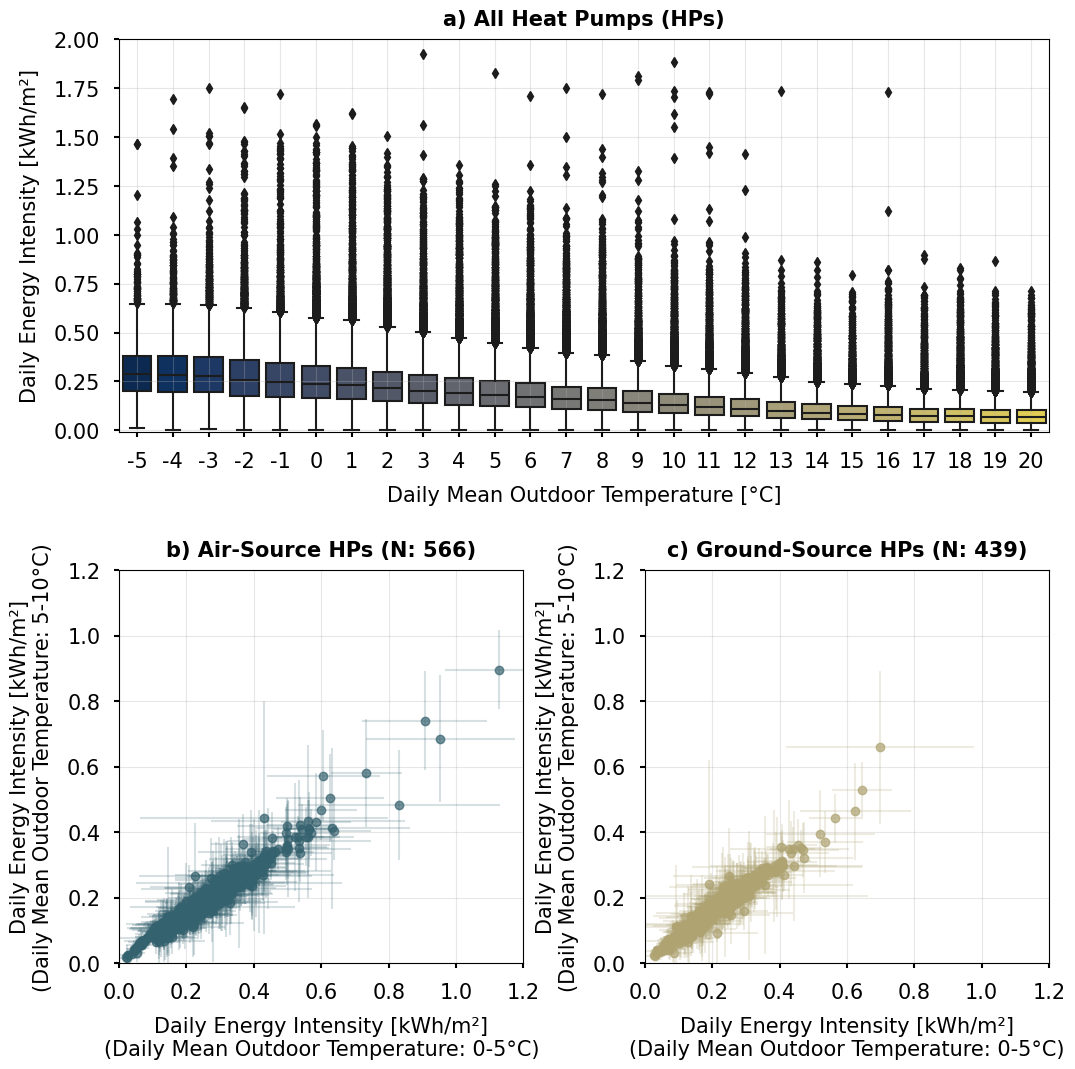

In [14]:
# ------------- PREPARE DATA -------------

df_smd_copy = df_smd.copy()

# round temperatures to full integers 
df_smd_copy['Temperature_avg_daily'] = df_smd_copy['Temperature_avg_daily'].round(0)

# add meta data about living area and heat pump type 
df_smd_copy = pd.merge(df_smd_copy, heapo.get_meta_data_overview()[['Household_ID', 'Survey_Building_LivingArea', 'Survey_HeatPump_Installation_Type']], on='Household_ID', how='left')
df_smd_copy = df_smd_copy[df_smd_copy['Survey_Building_LivingArea']>0]

# calculate energy intensity (energy divided by living area)
df_smd_copy['kWh_received_Total_byLivingArea'] = df_smd_copy['kWh_received_Total'] / df_smd_copy['Survey_Building_LivingArea']

# ------------- CREATE GRAPH -------------

# generate graph with first row being one plot and second row being two plots
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.35, wspace=0.3)
ax1 = fig.add_subplot(gs[0, :]) # first row
ax2 = fig.add_subplot(gs[1, 0]) # second row, first plot
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2, sharex=ax2) # second row, second plot

fontsize = 15

# ------------- FIRST GRAPH: BOXPLOT -------------

# box plots
df_data = df_smd_copy.copy()
df_data = df_data[df_data['Temperature_avg_daily']>=-5]
df_data = df_data[df_data['Temperature_avg_daily']<=20]
sns.boxplot(data=df_data, x='Temperature_avg_daily', y='kWh_received_Total_byLivingArea', orient='v', ax=ax1, palette='cividis') # color=COLOR_DARK
ax1.set_ylim(-0.01, 2.0)
ax1.set_xlabel('Daily Mean Outdoor Temperature [°C]', fontsize=fontsize, labelpad=10) # fontweight='bold'
ax1.set_ylabel('Daily Energy Intensity [kWh/m²]', fontsize=fontsize, labelpad=10) # fontweight='bold'
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(range(-5, 21, 1))
ax1.tick_params(axis='both', which='major', labelsize=fontsize, labelrotation=0, width=1.5, pad=10)
ax1.grid(alpha=0.3)
ax1.set_title('a) All Heat Pumps (HPs)', fontsize=fontsize, fontweight='bold', pad=10)


# ------------- SECOND ROW GRAPHS: SCATTER PLOTS -------------

description_list = [
    {'hp_type' : 'air-source', 'title' : 'b) Air-Source HPs', 'color' : COLOR_DARK, 'ax' : ax2},
    {'hp_type' : 'ground-source', 'title' : 'c) Ground-Source HPs', 'color' : COLOR_YELLOW, 'ax' : ax3},
]

for description_dict in description_list:

    df_data = df_smd_copy.copy()
    df_data = df_data[df_data['Survey_HeatPump_Installation_Type']==description_dict['hp_type']]

    # get range 0-5 degrees
    df_0to5 = df_data.copy()
    df_0to5 = df_0to5[(df_0to5['Temperature_avg_daily']>=0) & (df_0to5['Temperature_avg_daily']<5)]
    df_0to5 = df_0to5.groupby('Household_ID').agg({'kWh_received_Total_byLivingArea': ['mean', 'std', 'count'],}).reset_index()
    df_0to5.columns = ['Household_ID', 'kWh_received_Total_byLivingArea_mean_0to5', 'kWh_received_Total_byLivingArea_std_0to5', 'Number_Observations_0to5']

    # range 5 to 10 degrees 
    df5to10 = df_data.copy()
    df5to10 = df5to10[(df5to10['Temperature_avg_daily']>=5) & (df5to10['Temperature_avg_daily']<10)]
    df5to10 = df5to10.groupby('Household_ID').agg({'kWh_received_Total_byLivingArea': ['mean', 'std', 'count'],}).reset_index()
    df5to10.columns = ['Household_ID', 'kWh_received_Total_byLivingArea_mean_5to10', 'kWh_received_Total_byLivingArea_std_5to10', 'Number_Observations_5to10']

    # combine both ranges and only include households with more than 10 observations in each range
    df_grouped = pd.merge(df_0to5, df5to10, on='Household_ID', how='outer')
    df_grouped = df_grouped[df_grouped['Number_Observations_0to5']>=10]
    df_grouped = df_grouped[df_grouped['Number_Observations_5to10']>=10]
    df_grouped.reset_index(drop=True, inplace=True)

    # plot the scatter plot
    ax = description_dict['ax']
    ax.scatter(df_grouped['kWh_received_Total_byLivingArea_mean_0to5'], df_grouped['kWh_received_Total_byLivingArea_mean_5to10'], color=description_dict['color'], alpha=0.6)
    ax.errorbar(df_grouped['kWh_received_Total_byLivingArea_mean_0to5'], df_grouped['kWh_received_Total_byLivingArea_mean_5to10'], xerr=df_grouped['kWh_received_Total_byLivingArea_std_0to5'], yerr=df_grouped['kWh_received_Total_byLivingArea_std_5to10'], fmt='o', color=description_dict['color'], alpha=0.2)
    ax.grid(alpha=0.3)
    ax.set_xlabel('Daily Energy Intensity [kWh/m²]\n(Daily Mean Outdoor Temperature: 0-5°C)', fontsize=fontsize, labelpad=10)
    ax.set_ylabel('Daily Energy Intensity [kWh/m²]\n(Daily Mean Outdoor Temperature: 5-10°C)', fontsize=fontsize, labelpad=10)
    ax.set_title(description_dict['title']+' (N: {})'.format(len(df_data['Household_ID'].unique())), fontsize=fontsize, fontweight='bold', pad=10)
    ax.tick_params(axis='both', which='major', labelsize=fontsize, labelrotation=0, width=1.5, pad=10)
    ax.set_ylim(0.0, 1.2)
    ax.set_xlim(0.0, 1.2)
    ax.set_yticks(np.arange(0, 1.3, 0.2))
    ax.set_xticks(np.arange(0, 1.3, 0.2))

fig.set_facecolor('white')
plt.show()
